In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
traind=pd.read_csv('/content/Training.csv')
traind.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
testd=pd.read_csv('/content/Testing.csv')
testd.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
traind['Unnamed: 133'].value_counts()

Series([], Name: Unnamed: 133, dtype: int64)

In [ ]:
traind.drop("Unnamed: 133",axis=1,inplace=True)

In [ ]:
traind.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
traind.isnull().sum().sum()

0

In [ ]:
traind.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Pie Chart showing Distribution of Itching Symptom into Number of Yes/No')

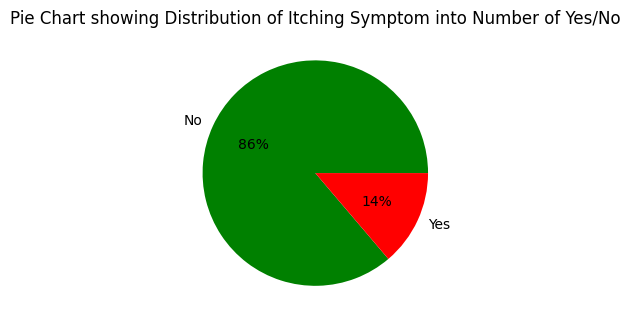

In [ ]:
plt.figure(figsize=(8,8))
a=traind['itching'].value_counts()
plt.subplot(121)
plt.pie(x=a,data=traind,labels=['No','Yes'],autopct='%.0f%%',colors='gr')
plt.title("Pie Chart showing Distribution of Itching Symptom into Number of Yes/No")

Text(0.5, 1.0, 'Pie Chart showing Distribution of Continous Sneezing Symptom into Number of Yes/No')

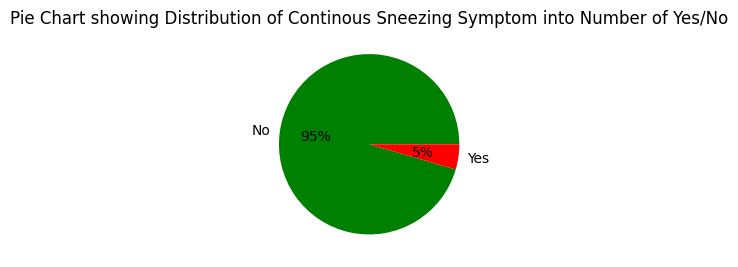

In [ ]:
b=traind['continuous_sneezing'].value_counts()
plt.subplot(121)
plt.pie(x=b,data=traind,labels=['No','Yes'],autopct='%.0f%%',colors='gr')
plt.title("Pie Chart showing Distribution of Continous Sneezing Symptom into Number of Yes/No")

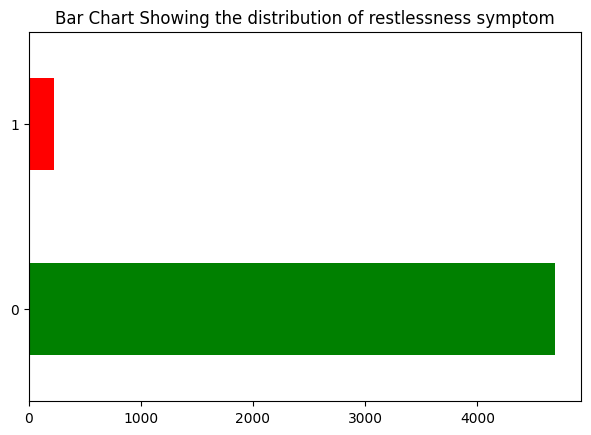

In [ ]:
plt.subplot(1,2,1)
traind['restlessness'].value_counts().plot(kind='barh',color=['g','r'])
plt.title("Bar Chart Showing the distribution of restlessness symptom")
plt.subplots_adjust(left=0.5,right=2.4)

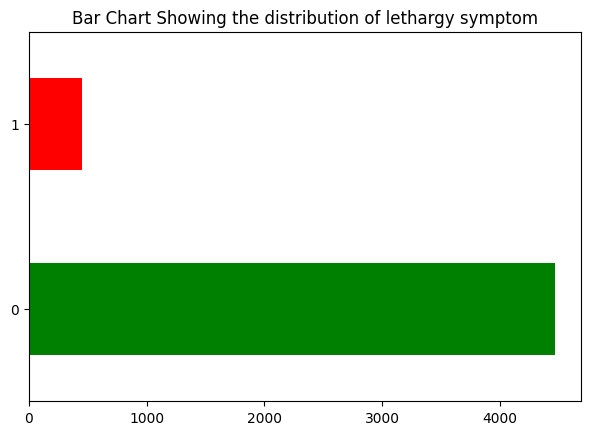

In [ ]:
plt.subplot(1,2,1)
traind['lethargy'].value_counts().plot(kind='barh',color=['g','r'])
plt.title("Bar Chart Showing the distribution of lethargy symptom")
plt.subplots_adjust(left=0.5,right=2.4)

Text(0.5, 1.0, 'Importance of Itching symptom to determine Fungal infection')

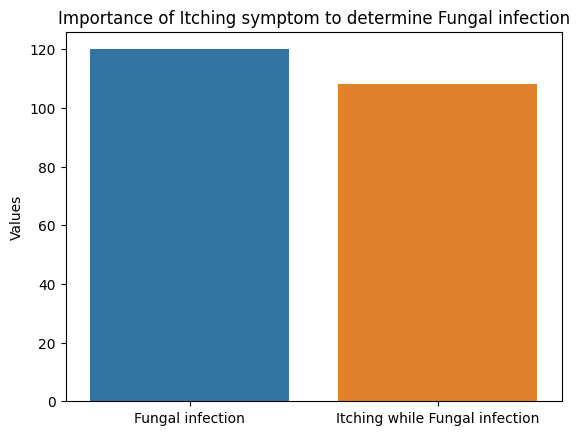

In [ ]:
a=len(traind[traind['prognosis']=='Fungal infection'])
b=len(traind[(traind['itching']==1) & (traind['prognosis']=='Fungal infection')])
fi= pd.DataFrame(data=[a,b],columns=['Values'],index=['Fungal infection','Itching while Fungal infection'])
sns.barplot(data=fi,x=fi.index,y=fi['Values'])
plt.title('Importance of Itching symptom to determine Fungal infection')

Text(0.5, 1.0, 'Importance of Yellowing of Eyes to determine Tuberculosis')

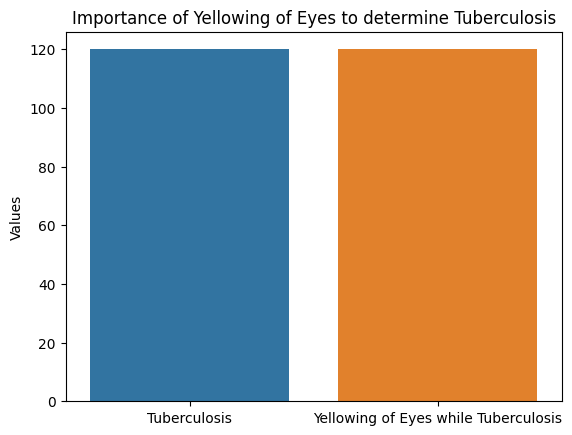

In [ ]:
a=len(traind[traind['prognosis']=='Tuberculosis'])
b=len(traind[(traind['yellowing_of_eyes']==1) & (traind['prognosis']=='Tuberculosis')])
fi= pd.DataFrame(data=[a,b],columns=['Values'],index=['Tuberculosis','Yellowing of Eyes while Tuberculosis'])
sns.barplot(data=fi,x=fi.index,y=fi['Values'])
plt.title('Importance of Yellowing of Eyes to determine Tuberculosis')

In [ ]:
corr=traind.corr()
corr.style.background_gradient('coolwarm')

<ipython-input-25-e37d892fa4b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=traind.corr()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
traind.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
             'yellow_urine','acute_liver_failure','swelling_of_stomach',
             'drying_and_tingling_lips','continuous_feel_of_urine',
             'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
             'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
             'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
             'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
             'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
             'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
             'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
             'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'
             ],axis=1,inplace=True)

In [ ]:
def data_preprocessing(data):
  data.drop(['weight_gain','cold_hands_and_feets','anxiety','irregular_sugar_level',
             'yellow_urine','acute_liver_failure','swelling_of_stomach',
             'drying_and_tingling_lips','continuous_feel_of_urine',
             'internal_itching','polyuria','mood_swings','receiving_unsterile_injections',
             'stomach_bleeding','prominent_veins_on_calf','loss_of_smell','throat_irritation',
             'redness_of_eyes','sinus_pressure','runny_nose','pain_during_bowel_movements',
             'pain_in_anal_region','cramps','bruising','enlarged_thyroid','brittle_nails',
             'swollen_extremeties','slurred_speech','distention_of_abdomen','fluid_overload.1',
             'skin_peeling','silver_like_dusting','small_dents_in_nails','blister',
             'red_sore_around_nose','bloody_stool','swollen_blood_vessels','hip_joint_pain',
             'painful_walking','spinning_movements','altered_sensorium','toxic_look_(typhos)'
             ],axis=1,inplace=True)
  return data

In [ ]:
testd=data_preprocessing(testd)

In [ ]:
x=traind.drop('prognosis',axis=1)
y=traind.prognosis
x_test=testd.drop('prognosis',axis=1)
y_test=testd.prognosis
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)

In [ ]:
def model_evaluation(classifier):
  y_pred=classifier.predict(x_val)
  yt_pred=classifier.predict(x_train)
  y_pred1=classifier.predict(x_test)
  print('The Training Accuracy of the algorithm is',accuracy_score(y_train,yt_pred))
  print('The Validation Accuracy of the algorithm is',accuracy_score(y_val,y_pred))
  print('The Testing Accuracy of the algorithm is',accuracy_score(y_test,y_pred1))
  return[(accuracy_score(y_train,yt_pred)),(accuracy_score(y_val,y_pred)),(accuracy_score(y_test,y_pred1))]

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn_results=model_evaluation(knn)

The Training Accuracy of the algorithm is 1.0
The Validation Accuracy of the algorithm is 1.0
The Testing Accuracy of the algorithm is 1.0


In [ ]:
svm=SVC(C=1)
svm.fit(x_train,y_train)

SVC(C=1)

In [ ]:
svm_results=model_evaluation(svm)

The Training Accuracy of the algorithm is 1.0
The Validation Accuracy of the algorithm is 1.0
The Testing Accuracy of the algorithm is 1.0


In [ ]:
dtc=DecisionTreeClassifier(max_features=10)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_features=10)

In [ ]:
dtc_results=model_evaluation(dtc)

The Training Accuracy of the algorithm is 1.0
The Validation Accuracy of the algorithm is 1.0
The Testing Accuracy of the algorithm is 1.0


In [ ]:
rfc=RandomForestClassifier(max_depth=13)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=13)

In [ ]:
rfc_results=model_evaluation(rfc)

The Training Accuracy of the algorithm is 1.0
The Validation Accuracy of the algorithm is 1.0
The Testing Accuracy of the algorithm is 0.9761904761904762


In [ ]:
results=pd.DataFrame(data=[knn_results,svm_results,dtc_results,rfc_results],
                     columns=['Training Accuracy','Validation Accuracy','Testing Accuracy'],
                     index=['K Nearest Neighbors Classfier','Support Vector Machines',
                            'Decision Trees Classfier','Random Forest Classfier'])
results

,Training Accuracy,Validation Accuracy,Testing Accuracy
K Nearest Neighbors Classfier,NaN,NaN,NaN
Support Vector Machines,1.0,1.0,1.0
Decision Trees Classfier,1.0,1.0,1.0
Random Forest Classfier,NaN,NaN,NaN


In [ ]:
a=rfc.feature_importances_
col=x.columns
feat_imp={}
for i,j in zip(a,col):
  feat_imp[j]=i
feat_imp

{'itching': 0.011160378075688546,
 'skin_rash': 0.005753979923569158,
 'nodal_skin_eruptions': 0.007829030245574539,
 'continuous_sneezing': 0.008365050452264461,
 'shivering': 0.005975768412545634,
 'chills': 0.008349607069098128,
 'joint_pain': 0.012146868279489083,
 'stomach_pain': 0.007791225229639581,
 'acidity': 0.006978314516282781,
 'ulcers_on_tongue': 0.0056841512315674815,
 'muscle_wasting': 0.005677874422053535,
 'vomiting': 0.013962264433752362,
 'burning_micturition': 0.003529570062885272,
 'spotting_ urination': 0.006679719429526648,
 'fatigue': 0.007507838529851092,
 'weight_loss': 0.009673264301447505,
 'restlessness': 0.006652159596879236,
 'lethargy': 0.010506450239292692,
 'patches_in_throat': 0.003215427282416371,
 'cough': 0.006575063495346932,
 'high_fever': 0.010292281456005796,
 'sunken_eyes': 0.00949429300152219,
 'breathlessness': 0.007820974914759495,
 'sweating': 0.013935702932809681,
 'dehydration': 0.00616332087891504,
 'indigestion': 0.008746614868873523,

In [ ]:
rfc_results=[]
knn_results=[]

In [ ]:
for main in [0.020, 0.018, 0.016, 0.014, 0.012, 0.01, 0.008]:
    to_drop = []

    for i, j in zip(feat_imp.keys(), feat_imp.values()):
        if j < main:
            to_drop.append(i)

    x_new = x.drop(to_drop, axis=1)
    y_new = y
    x1_train, x1_val, y1_train, y1_val = train_test_split(x_new, y_new, test_size=0.2)
    x1_test = x_test.drop(to_drop, axis=1)
    y1_test = y_test

    def model_evaluation1(num_features, classifier, x_val, y_val):
      y_train_pred = classifier.predict(x1_train)
      train_accuracy = accuracy_score(y1_train, y_train_pred)
      y_val_pred = classifier.predict(x_val)
      test_accuracy = accuracy_score(y_val, y_val_pred)

      return train_accuracy, test_accuracy
    rfc_new = RandomForestClassifier()
    rfc_new.fit(x1_train, y1_train)
    temp1 = model_evaluation1(x1_train.shape[1], rfc_new, x1_val, y1_val)
    rfc_results.append([x1_train.shape[1], temp1[0], temp1[1]])

    knn_new = KNeighborsClassifier()
    knn_new.fit(x1_train, y1_train)
    temp2 = model_evaluation1(x1_train.shape[1], knn_new, x1_val, y1_val)
    knn_results.append([x1_train.shape[1], temp2[0], temp2[1]])

In [ ]:
randomf=pd.DataFrame(data=rfc_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])
randomf

,Number of features,Training Accuracy,Testing Accuracy
0,5,0.173272,0.154472
1,11,0.335620,0.334350
2,17,0.482470,0.466463
3,24,0.582063,0.525407
4,36,0.804878,0.804878
5,48,0.915142,0.912602
6,60,0.942073,0.951220


In [ ]:
knn_table=pd.DataFrame(data=knn_results,columns=['Number of features','Training Accuracy','Testing Accuracy'])
knn_table

,Number of features,Training Accuracy,Testing Accuracy
0,5,0.170986,0.163618
1,11,0.331555,0.344512
2,17,0.479675,0.471545
3,24,0.578252,0.540650
4,36,0.803608,0.803862
5,48,0.907012,0.926829
6,60,0.942073,0.951220


In [ ]:
len(to_drop)
x_new=x.drop(to_drop,axis=1)
y_new=y
x_new.head()

,itching,continuous_sneezing,chills,joint_pain,vomiting,weight_loss,lethargy,high_fever,sunken_eyes,sweating,...,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,receiving_blood_transfusion,coma,history_of_alcohol_consumption,blood_in_sputum,palpitations,inflammatory_nails
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x1_train,x1_val,y1_train,y1_val=train_test_split(x_new,y_new,test_size=0.2)
x1_test=x_test.drop(to_drop,axis=1)
y1_test=y_test
rfc_new=RandomForestClassifier()
rfc_new.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc_new.predict(x1_val)
yt_pred=rfc_new.predict(x1_train)
y_pred1=rfc_new.predict(x1_test)
print('The Training Accuracy of the algorithm is',accuracy_score(y_train,yt_pred))
print('The Validation Accuracy of the algorithm is',accuracy_score(y_val,y_pred))
print('The Testing Accuracy of the algorithm is',accuracy_score(y_test,y_pred1))

The Training Accuracy of the algorithm is 0.02184959349593496
The Validation Accuracy of the algorithm is 0.024390243902439025
The Testing Accuracy of the algorithm is 0.9285714285714286


In [ ]:
knn_new=KNeighborsClassifier()
knn_new.fit(x1_train,y1_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_new.predict(x1_val)
yt_pred=knn_new.predict(x1_train)
y_pred1=knn_new.predict(x1_test)
print('The Training Accuracy of the algorithm is',accuracy_score(y_train,yt_pred))
print('The Validation Accuracy of the algorithm is',accuracy_score(y_val,y_pred))
print('The Testing Accuracy of the algorithm is',accuracy_score(y_test,y_pred1))

The Training Accuracy of the algorithm is 0.02108739837398374
The Validation Accuracy of the algorithm is 0.02540650406504065
The Testing Accuracy of the algorithm is 0.9285714285714286


In [ ]:
testd.join(pd.DataFrame(y_pred1,columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Drug Reaction
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,Impetigo
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


In [ ]:
pickle.dump(knn_new,open('model.pkl','wb'))